In [1]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
# Chargement des données
df = pd.read_csv('data.csv')
print(f"Aperçu des données ({df.shape[0]} lignes, {df.shape[1]} colonnes):")

df.head()

Aperçu des données (7438 lignes, 26 colonnes):


,source,neighborhood,city,state,transaction,property_type,date,price,suffix,price_ttc,size,rooms,bedrooms,bathrooms,parkings,finishing,condition,construction_year,age,air_conditioning,central_heating,swimming_pool,elevator,garden,equipped_kitchen,amenities
0,tecnocasa,Tunis Belvedere,El Menzah,Tunis,sale,depot,4/6/2025,8500000.0,TTC,8500000.0,5600,1.0,0.0,0.0,0.0,NaN,NaN,1920.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,newkey,Les berges du Lac 2,Les berges du Lac,Tunis,sale,villa,2/23/2025,8000000.0,TTC,8000000.0,1200,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,century 21,Carthage,Carthage,Tunis,sale,villa,10/15/2024,6500000.0,TTC,6500000.0,600,9.0,5.0,4.0,6.0,moyen standing,à rénover,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,Piscine+Master Bedroom+Vue mer+Alarme+Titre Bl...
3,century 21,Carthage Plage,Carthage,Tunis,sale,villa,3/31/2024,6500000.0,TTC,6500000.0,700,8.0,6.0,4.0,3.0,haut standing,bonne condition,2010.0,15.0,1.0,1.0,0.0,1.0,1.0,1.0,Prise lave-vaisselle+Terrasse+Chambre de Servi...
4,century 21,Les berges du Lac 2,Les berges du Lac,Tunis,sale,villa,12/10/2024,6500000.0,TTC,6500000.0,550,8.0,6.0,3.0,5.0,haut standing,excellente condition,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,Alarme+Titre Bleu+Terrasse+Chambre de Service+...


In [4]:
print("\nInformations sur les types de données:")
display(df.info())



Informations sur les types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7438 entries, 0 to 7437
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             7438 non-null   object 
 1   neighborhood       7438 non-null   object 
 2   city               7438 non-null   object 
 3   state              7438 non-null   object 
 4   transaction        7438 non-null   object 
 5   property_type      7438 non-null   object 
 6   date               7438 non-null   object 
 7   price              7194 non-null   float64
 8   suffix             7194 non-null   object 
 9   price_ttc          7194 non-null   float64
 10  size               7438 non-null   int64  
 11  rooms              7424 non-null   float64
 12  bedrooms           7424 non-null   float64
 13  bathrooms          7424 non-null   float64
 14  parkings           7427 non-null   float64
 15  finishing          5524 non-null

None

In [6]:
numeric_columns = ['price','price_ttc', 'size', 'rooms', 'bedrooms', 'bathrooms', 'parkings', 
                  'construction_year', 'age', 'air_conditioning', 'central_heating', 
                  'swimming_pool', 'elevator', 'garden', 'equipped_kitchen']
for col in numeric_columns:
    if col in df.columns:
        # Afficher le type original
        original_type = df[col].dtype
        
        # Convertir en numérique
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Afficher les informations sur la conversion
        na_count = df[col].isna().sum()
        print(f"Conversion de '{col}': {original_type} -> {df[col].dtype}, valeurs NA créées: {na_count}")

Conversion de 'price': float64 -> float64, valeurs NA créées: 244
Conversion de 'price_ttc': float64 -> float64, valeurs NA créées: 244
Conversion de 'size': int64 -> int64, valeurs NA créées: 0
Conversion de 'rooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'bedrooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'bathrooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'parkings': float64 -> float64, valeurs NA créées: 11
Conversion de 'construction_year': float64 -> float64, valeurs NA créées: 4974
Conversion de 'age': float64 -> float64, valeurs NA créées: 4975
Conversion de 'air_conditioning': float64 -> float64, valeurs NA créées: 1864
Conversion de 'central_heating': float64 -> float64, valeurs NA créées: 1864
Conversion de 'swimming_pool': float64 -> float64, valeurs NA créées: 1864
Conversion de 'elevator': float64 -> float64, valeurs NA créées: 1864
Conversion de 'garden': float64 -> float64, valeurs NA créées: 1864
Conversion de 'equipped

In [7]:
print("\nInformations sur les types de données après conversion:")
display(df.info())


Informations sur les types de données après conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7438 entries, 0 to 7437
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             7438 non-null   object 
 1   neighborhood       7438 non-null   object 
 2   city               7438 non-null   object 
 3   state              7438 non-null   object 
 4   transaction        7438 non-null   object 
 5   property_type      7438 non-null   object 
 6   date               7438 non-null   object 
 7   price              7194 non-null   float64
 8   suffix             7194 non-null   object 
 9   price_ttc          7194 non-null   float64
 10  size               7438 non-null   int64  
 11  rooms              7424 non-null   float64
 12  bedrooms           7424 non-null   float64
 13  bathrooms          7424 non-null   float64
 14  parkings           7427 non-null   float64
 15  finishing      

None

In [8]:
print("\nStatistiques descriptives:")
display(df.describe().T)


Statistiques descriptives:


,count,mean,std,min,25%,50%,75%,max
price,7194.0,285790.353767,591800.806591,130.0,1900.0,4000.0,380000.0,8500000.0
price_ttc,7194.0,287086.929247,592481.858110,250.0,1900.0,4500.0,385000.0,8500000.0
size,7438.0,211.179753,303.170208,20.0,100.0,140.0,210.0,6455.0
rooms,7424.0,3.657328,2.159298,0.0,3.0,3.0,4.0,74.0
bedrooms,7424.0,2.395878,1.611520,0.0,1.0,2.0,3.0,22.0
bathrooms,7424.0,1.448545,1.050929,0.0,1.0,1.0,2.0,18.0
parkings,7427.0,1.028410,2.659028,0.0,0.0,1.0,1.0,180.0
construction_year,2464.0,2014.317776,12.513966,1900.0,2010.0,2019.0,2023.0,2025.0
age,2463.0,10.695087,12.556000,0.0,2.0,6.0,15.0,125.0
air_conditioning,5574.0,0.877108,0.328343,0.0,1.0,1.0,1.0,1.0



Récapitulatif détaillé des données manquantes:


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
age,float64,2463,4975,66.89,52
construction_year,float64,2464,4974,66.87,52
condition,object,5463,1975,26.55,5
finishing,object,5524,1914,25.73,5
amenities,object,5574,1864,25.06,4343
equipped_kitchen,float64,5574,1864,25.06,2
garden,float64,5574,1864,25.06,2
elevator,float64,5574,1864,25.06,2
swimming_pool,float64,5574,1864,25.06,2
central_heating,float64,5574,1864,25.06,2


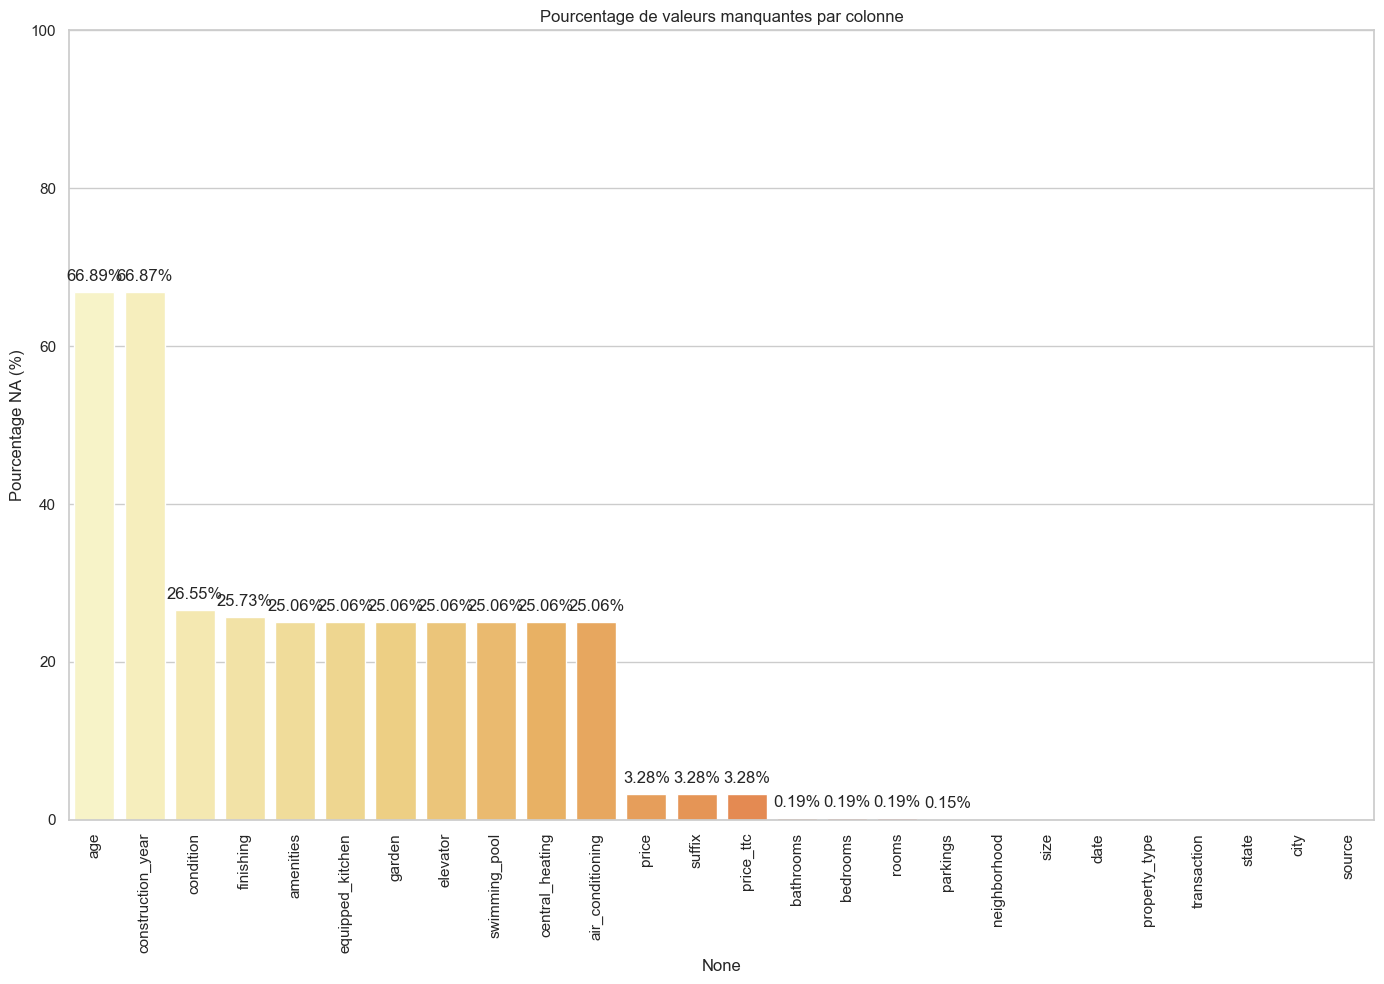


Colonnes avec plus de 30% de valeurs manquantes:


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
age,float64,2463,4975,66.89,52
construction_year,float64,2464,4974,66.87,52



Colonnes sans valeurs manquantes:


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
neighborhood,object,7438,0,0.0,192
size,int64,7438,0,0.0,532
date,object,7438,0,0.0,879
property_type,object,7438,0,0.0,7
transaction,object,7438,0,0.0,3
state,object,7438,0,0.0,6
city,object,7438,0,0.0,60
source,object,7438,0,0.0,4


In [10]:
# Analyse détaillée des valeurs manquantes
def analyze_missing_data(df):
    # Calculer les informations sur les valeurs manquantes
    missing_count = df.isna().sum()
    missing_percent = (df.isna().sum() / len(df) * 100).round(2)
    
    # Créer un DataFrame avec ces informations
    missing_data = pd.DataFrame({
        'Type de données': df.dtypes,
        'Valeurs non-NA': df.count(),
        'Valeurs NA': missing_count,
        'Pourcentage NA (%)': missing_percent,
        'Valeurs uniques': df.nunique()
    })
    
    # Trier par pourcentage de valeurs manquantes (décroissant)
    missing_data = missing_data.sort_values('Pourcentage NA (%)', ascending=False)
    
    return missing_data

# Générer le récapitulatif des données manquantes
missing_summary = analyze_missing_data(df)

# Afficher le récapitulatif complet
print("\nRécapitulatif détaillé des données manquantes:")
display(missing_summary)

# Visualiser les données manquantes sous forme de graphique
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=missing_summary.index, 
                 y='Pourcentage NA (%)', 
                 data=missing_summary,
                 palette='YlOrRd')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()

# Ajouter les pourcentages sur les barres
for i, value in enumerate(missing_summary['Pourcentage NA (%)']):
    if value > 0:  # Afficher uniquement les valeurs non nulles
        ax.text(i, value + 1, f'{value}%', ha='center', va='bottom')

plt.show()

# Identifier les colonnes avec beaucoup de valeurs manquantes
high_missing_cols = missing_summary[missing_summary['Pourcentage NA (%)'] > 30]
if not high_missing_cols.empty:
    print("\nColonnes avec plus de 30% de valeurs manquantes:")
    display(high_missing_cols)

# Identifier les colonnes sans valeurs manquantes
no_missing_cols = missing_summary[missing_summary['Pourcentage NA (%)'] == 0]
if not no_missing_cols.empty:
    print("\nColonnes sans valeurs manquantes:")
    display(no_missing_cols)

In [11]:
# Valeurs uniques pour les colonnes catégorielles
unique_transactions = df['transaction'].unique()
unique_sources = df['source'].unique()
unique_property_types = df['property_type'].unique()
unique_finishings = df['finishing'].unique()
unique_conditions = df['condition'].unique()
unique_neighborhoods= df['neighborhood'].unique()
print("\nValeurs uniques pour la colonne 'transaction':")
print(unique_transactions)
print("\nValeurs uniques pour la colonne 'finishing':")
print(unique_finishings)
print("Valeurs uniques pour la colonne 'condition':")
print(unique_conditions)
print("\nValeurs uniques pour la colonne 'property_type':")
print(unique_property_types)
print("Valeurs uniques pour la colonne 'source':")
print(unique_sources)

print("\nValeurs uniques pour la colonne 'neighborhood':")
print(unique_neighborhoods)


Valeurs uniques pour la colonne 'transaction':
['sale' 'rent_furnished' 'rent']

Valeurs uniques pour la colonne 'finishing':
[nan 'moyen standing' 'haut standing' 'très haut standing' 'économique'
 'social']
Valeurs uniques pour la colonne 'condition':
[nan 'à rénover' 'bonne condition' 'excellente condition' 'neuf'
 'à rafraichir']

Valeurs uniques pour la colonne 'property_type':
['depot' 'villa' 'duplex' 'bureau' 'local commercial' 'appartement'
 'étage de villa']
Valeurs uniques pour la colonne 'source':
['tecnocasa' 'newkey' 'century 21' 'remax']

Valeurs uniques pour la colonne 'neighborhood':
['Tunis Belvedere' 'Les berges du Lac 2' 'Carthage' 'Carthage Plage'
 'Mimosas villas Et Bungalows' 'El Kantaoui' 'Gammarth village'
 'Chotrana 3' 'Les berges du Lac 1' 'Nabeul centre' 'Mutuelle Ville'
 'Gammarth Sup' 'Bab Bhar' 'Sidi Abdelaziz' 'Cite Ennasr 1' 'Montplaisir'
 'Kelibia' 'Sidi Bousaid' 'Notre Dame' 'Bou Jerdga' 'Cité Mahrajène'
 'El Menzah 9' 'La Soukra' 'Aouina' 'El Menzah

<Figure size 1600x1000 with 0 Axes>

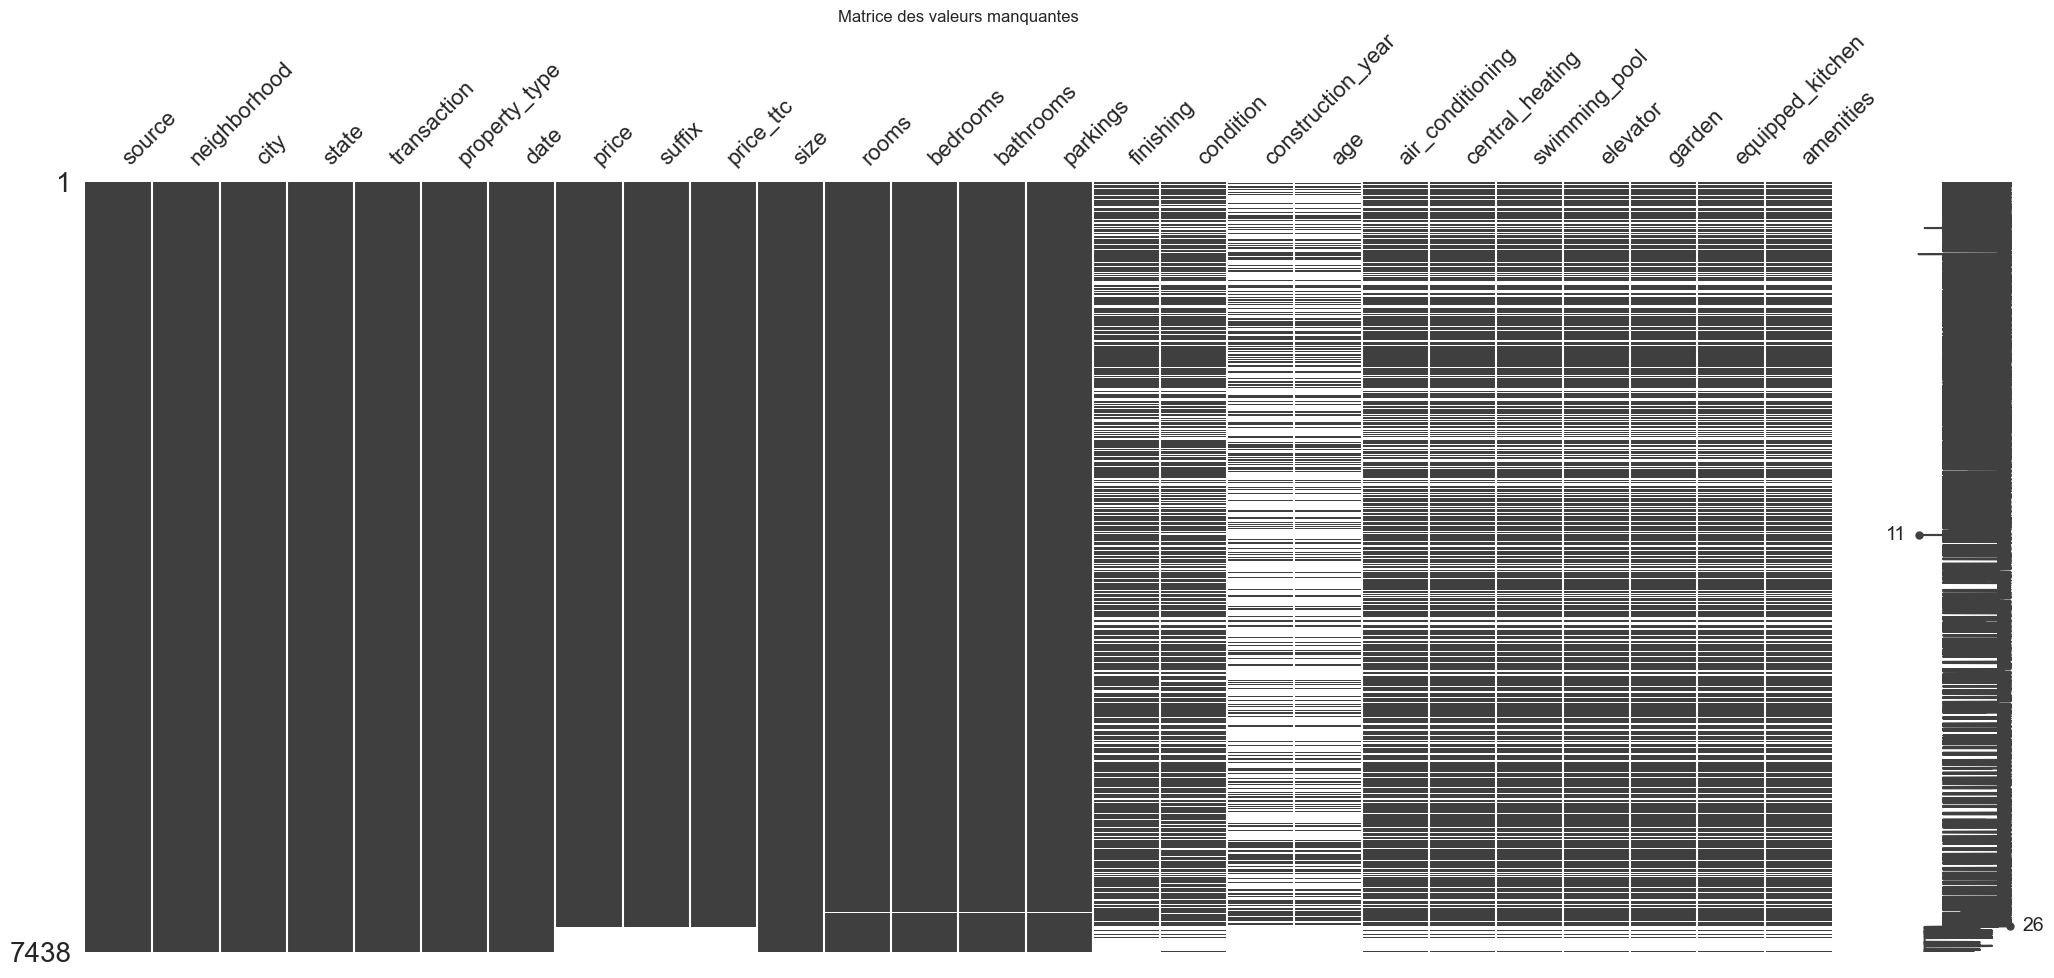

<Figure size 1600x1200 with 0 Axes>

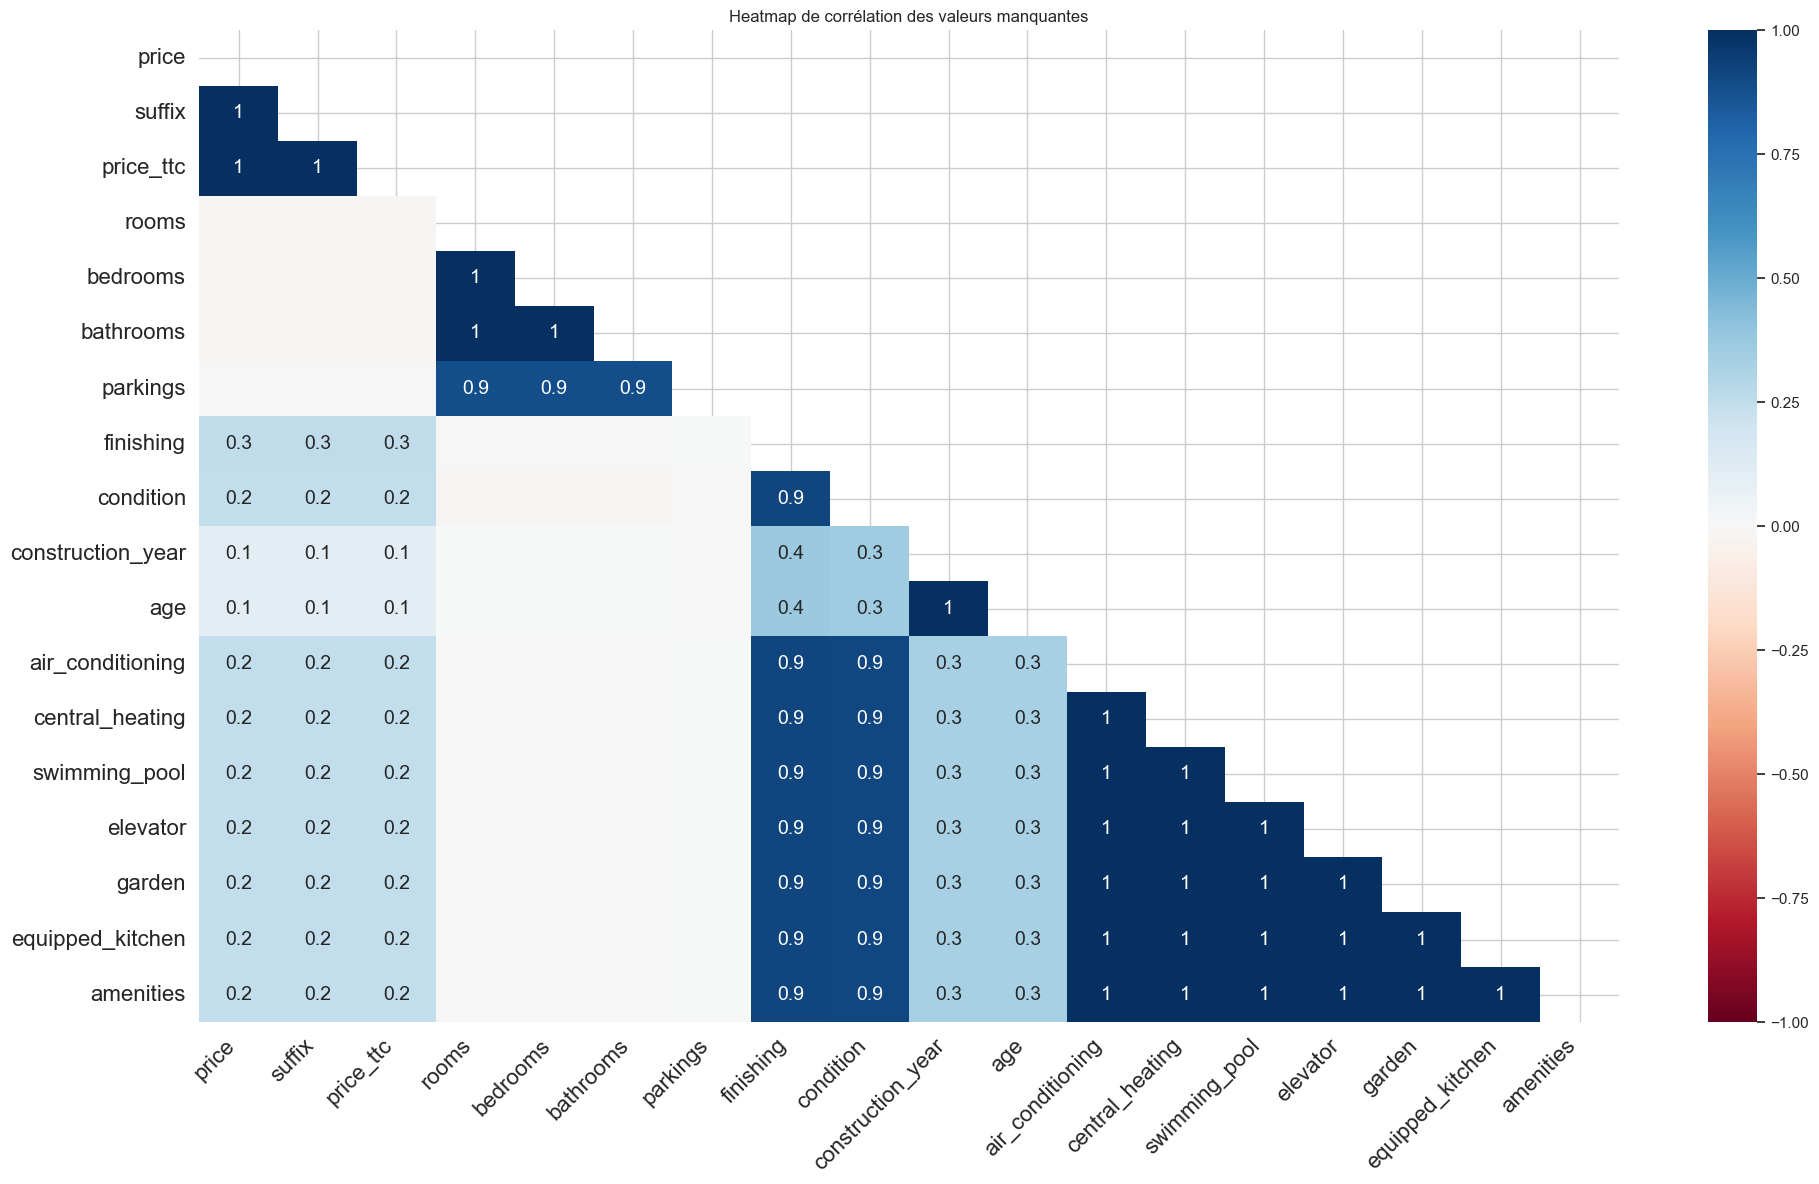

<Figure size 1600x1000 with 0 Axes>

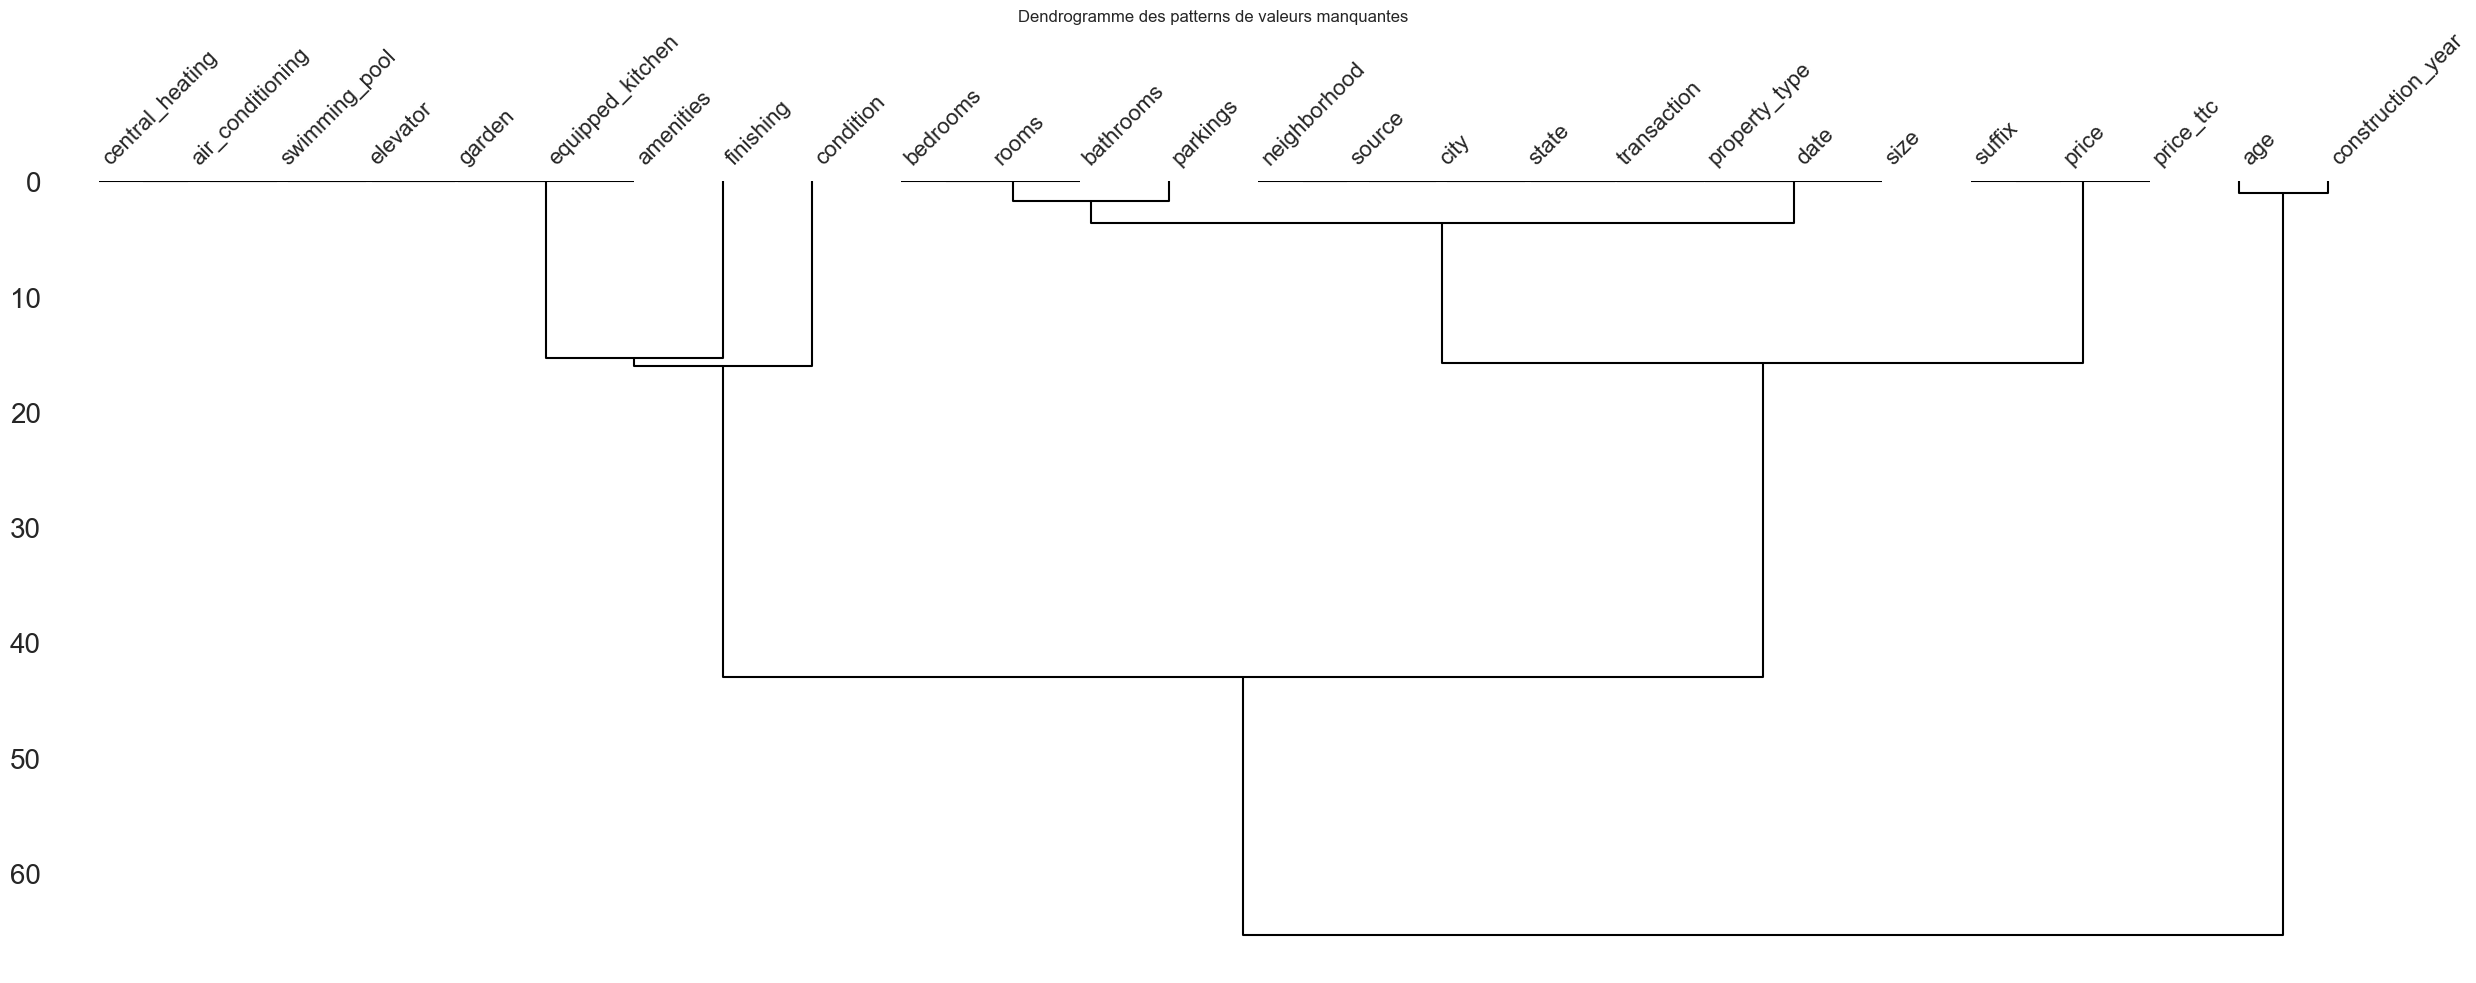

In [12]:
# Visualiser la matrice et le heatmap des valeurs manquantes
def visualize_missing_data(df):
    # Utiliser missingno pour créer des visualisations des valeurs manquantes
    plt.figure(figsize=(16, 10))
    msno.matrix(df)
    plt.title("Matrice des valeurs manquantes")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 12))
    msno.heatmap(df)
    plt.title("Heatmap de corrélation des valeurs manquantes")
    plt.tight_layout()
    plt.show()
    
    # Visualiser la densité des données
    plt.figure(figsize=(16, 10))
    msno.dendrogram(df)
    plt.title("Dendrogramme des patterns de valeurs manquantes")
    plt.tight_layout()
    plt.show()

# Appliquer la visualisation
visualize_missing_data(df)